# Bagging and Boosting

**In this notebook Boosting algorithm AdaBoost and Bagging is implemented with decision trees as the base classifiers. Experiments are done on a number of provided datasets with these implementations**

References:


*   https://towardsdatascience.com/adaboost-from-scratch-37a936da3d50
*   https://www.kaggle.com/code/ankan1998/bagged-decisontree-classifier-from-scratch/notebook
*   https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
*   https://pypi.org/project/tabulate/



In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn import preprocessing
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive/

Mounted at /content/gdrive/
/content/gdrive/MyDrive


**The first dataset is a letter dataset contains descriptions of the characters ”C” and ”G”, and the
goal is to distinguish between these two letters. The class label is either ”C” or ”G”. There are 16
attributes for things like the width of the letter and the total number of pixels turned on. There are
500 training and 1009 test examples. More detailed information about this dataset and the various
attributes is available here (obviously, we used only the letters C and G). The dataset is available at
https://archive.ics.uci.edu/ml/datasets/letter+recognition**

Letter dataset that contains descriptions of the characters” C” and” G”.


**Objective:**  To distinguish between the two letters. The class label is either” C” or” G”.


**Description of the dataset:**
*   There are 500 training and 1009 test examples. 
*   There are 16 attributes for things like the width of the letter and the total number of pixels turned on.
*   The dataset is available at https://archive.ics.uci.edu/ml/datasets/letter+recognition


**Data-Preprocessing:** 
*   First, filter the letter dataset on the alphabets ‘C’ and ‘G’.
*   Using Label encoder, assign labels to each letter.


In [ ]:
letter_data_path = '/content/gdrive/MyDrive/letter-recognition.data'
letter_df = pd.read_csv(letter_data_path)
letter_df.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [ ]:
# Assigning column names to dataframe
letter_df.columns=['lettr','x-box','y-box','width','high','onpix','x-bar','y-bar','x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']
letter_df.head()

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [ ]:
# Filtering dataset on 'C' and 'G' letters
letter_df = letter_df[(letter_df['lettr'] == 'C') | (letter_df['lettr'] == 'G')]
x_letter = letter_df.drop('lettr', axis=1)

# Assigning labels to each letter
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
le = preprocessing.LabelEncoder()
le.fit(letter_df['lettr'])
y_letter = le.transform(letter_df['lettr'])
letter_test_samples = 1009

**The credit dataset classifies people described by a set of attributes as good or bad credit risks.
There are 20 attributes encoding credit history, purpose of the loan, employment status, etc. There
are 400 training and 600 test examples. More detailed information about this dataset and the various
attributes is available here (we used the ”original” dataset, and did not make use of the ”cost matrix”).
The dataset is available at https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)**

**Objective:**  To classify people described by a set of attributes as good or bad credit risks. 

**Description of the dataset:**
*   There are 400 training and 600 test examples.
*   There are 20 attributes encoding credit history, purpose of the loan, employment status, etc
*   The dataset is available at
https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)



**Data-Preprocessing:**  
*   First, assign the column names from data description to the dataframe.
*   Drop the columns like Purpose and Telephone which do not add much information.
*   Create dummy variables for the categorical features.
*   Divide the dataset in x_credit (by dropping the target variable ‘Label’) and y_credit(Target variable Label)


In [ ]:
credit_data_path = '/content/gdrive/MyDrive/german.data'
credit_df = pd.read_csv(credit_data_path, sep=' ')
credit_df.head()

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [ ]:
# Assigning column names to dataframe
credit_df.columns = ['Status of existing checking account', 
                     'Duration in month', 
                     'Credit history', 
                     'Purpose', 
                     'Credit Amount', 
                     'Savings account/bonds', 
                     'Present employment since', 
                     'Installment rate in percentage of disposable income', 
                     'Personal status and sex', 
                     'Other debtors / guarantors', 
                     'Present residence since', 
                     'Property', 
                     'Age in years', 
                     'Other installment plans', 
                     'Housing', 
                     'Number of existing credits at this bank', 
                     'Job', 
                     'Number of people being liable to provide maintenance for', 
                     'Telephone', 
                     'Foreign worker', 
                     'Label']
credit_df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit Amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Label
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [ ]:
# Selecting only necessary columns
credit_df.drop(columns=['Purpose','Telephone'],axis=1,inplace=True)

# Creating dummy columns for categorical data
updated_credit_df = pd.get_dummies(data=credit_df, columns=['Status of existing checking account',
                                                            'Credit history',
                                                            'Savings account/bonds', 
                                                            'Present employment since',
                                                            'Personal status and sex', 
                                                            'Other debtors / guarantors', 
                                                            'Property',  
                                                            'Other installment plans', 
                                                            'Housing', 
                                                            'Job', 
                                                            'Foreign worker'])
updated_credit_df.head()

,Duration in month,Credit Amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Label,Status of existing checking account_A11,Status of existing checking account_A12,...,Other installment plans_A143,Housing_A151,Housing_A152,Housing_A153,Job_A171,Job_A172,Job_A173,Job_A174,Foreign worker_A201,Foreign worker_A202
0,48,5951,2,2,22,1,1,2,0,1,...,1,0,1,0,0,0,1,0,1,0
1,12,2096,2,3,49,1,2,1,0,0,...,1,0,1,0,0,1,0,0,1,0
2,42,7882,2,4,45,1,2,1,1,0,...,1,0,0,1,0,0,1,0,1,0
3,24,4870,3,4,53,2,2,2,1,0,...,1,0,0,1,0,0,1,0,1,0
4,36,9055,2,4,35,1,2,1,0,0,...,1,0,0,1,0,1,0,0,1,0


In [ ]:
x_credit = updated_credit_df.drop('Label', axis=1)
y_credit = np.array(updated_credit_df['Label'])
credit_test_samples = 600

**The spam dataset classifies email messages as spam or ham. The 57 attributes mainly encode the
number of times that certain words or characters occur. There are 1000 training and 3601 test
examples. The dataset is available at https://archive.ics.uci.edu/ml/datasets/spambase**

**Objective:**  To classify email messages as spam or ham.

**Description of the dataset:** 
*   There are 1000 training and 3601 test examples. 
*   There are 57 attributes that mainly encode the number of times that certain words or characters occur. 
*   The dataset is available at https://archive.ics.uci.edu/ml/datasets/spambase

**Data-Preprocessing:**  
*   First, assign the column names to the Spam Dataframe.
*   Divide the dataset into x_spam (dropping the target variable spam_label) and y_spam (target variable spam_label)


In [ ]:
spam_data_path = '/content/gdrive/MyDrive/spambase.data'
spam_df = pd.read_csv(spam_data_path, sep=',')
spam_df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,...,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [ ]:
# Assigning column names to dataframe
spam_df.columns = ['word_freq_make',
                    'word_freq_address',
                    'word_freq_all',
                    'word_freq_3d',
                    'word_freq_our',
                    'word_freq_over',
                    'word_freq_remove',
                    'word_freq_internet',
                    'word_freq_order',
                    'word_freq_mail',
                    'word_freq_receive',
                    'word_freq_will',
                    'word_freq_people',
                    'word_freq_report',
                    'word_freq_addresses',
                    'word_freq_free',
                    'word_freq_business',
                    'word_freq_email',
                    'word_freq_you',
                    'word_freq_credit',
                    'word_freq_your',
                    'word_freq_font',
                    'word_freq_000',
                    'word_freq_money',
                    'word_freq_hp',
                    'word_freq_hpl',
                    'word_freq_george',
                    'word_freq_650',
                    'word_freq_lab',
                    'word_freq_labs',
                    'word_freq_telnet',
                    'word_freq_857',
                    'word_freq_data',
                    'word_freq_415',
                    'word_freq_85',
                    'word_freq_technology',
                    'word_freq_1999',
                    'word_freq_parts',
                    'word_freq_pm',
                    'word_freq_direct',
                    'word_freq_cs',
                    'word_freq_meeting',
                    'word_freq_original',
                    'word_freq_project',
                    'word_freq_re',
                    'word_freq_edu',
                    'word_freq_table',
                    'word_freq_conference',
                    'char_freq_;',
                    'char_freq_(',
                    'char_freq_[',
                    'char_freq_!',
                    'char_freq_$',
                    'char_freq_#',
                    'capital_run_length_average',
                    'capital_run_length_longest',
                    'capital_run_length_total',
                    'spam_label']
spam_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_label
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [ ]:
x_spam = spam_df.drop('spam_label', axis=1)
y_spam = np.array(spam_df['spam_label'])
spam_test_samples = 3601

Function to split the dataset into train and test based on given test sample size.

In [ ]:
from pandas.core.common import random_state
def split_df(X, y, test_samples):
  test_ratio = test_samples / len(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_ratio, shuffle = True, random_state = 40)
  return X_train, X_test, y_train, y_test

**The first part is that you need to write a function to implement the AdaBoost algorithm we discussed
in class. The input of your function is the training and test sets, as well as the number of rounds
of boosting T. It should then run AdaBoost for T rounds, using the decision-tree algorithm as the
base learner. The function should then return the predictions of the final combined classifier on the
given training and test examples, as well as the training and test error rate of the combined classifier
following each of the T rounds.**

In [ ]:
#https://towardsdatascience.com/adaboost-from-scratch-37a936da3d50
def run_AdaBoost(X_train, X_test, y_train, y_test, T, depth):
        
  alphas = [] 
  weak_clfs = []
  training_errors = []
  testing_errors = []

  # Running for T rounds
  for round in range(0, T):
            
    # Assignging weights for current round
    if round == 0:
      weight = np.ones(len(y_train)) * 1 / len(y_train)  # At m = 0, weights are all the same and equal to 1 / N
    else:
      weight = weight * np.exp(alpha * (np.not_equal(y_train, y_train_pred)).astype(int))
            
    # Make training predictions on weak classifier using Decision Tree
    clf = DecisionTreeClassifier(max_depth = depth)     # Stump: Two terminal-node classification tree
    clf.fit(X_train, y_train, sample_weight = weight)
    y_train_pred = clf.predict(X_train)
            
    weak_clfs.append(clf)

    # Calculate training error
    train_error = (sum(weight * (np.not_equal(y_train, y_train_pred)).astype(int)))/sum(weight)
    training_errors.append(train_error)

    # Calculate alpha value
    alpha = np.log((1 - train_error) / train_error)
    alphas.append(alpha)

  weak_preds = pd.DataFrame(index = range(len(X_test)), columns = range(T))

  # Predicting target value for each weak classifier
  for round in range(T):
    y_pred_round = weak_clfs[round].predict(X_test) * alphas[round] 
    weak_preds.iloc[:,round] = y_pred_round
    
  # Compute predictions of the combined classifier
  y_preds = (1 * np.sign(weak_preds.T.sum())).astype(int)
      
  # Calculate testing error
  for wp in weak_clfs:
    y_pred_round = wp.predict(X_test)
    weight = np.ones(len(y_test))
    test_error = (sum(weight * (np.not_equal(y_test, y_pred_round)).astype(int)))/sum(weight)
    testing_errors.append(test_error)
  
  # Calculate accuracy of the combined classifier
  accuracy = np.sum(y_test == y_preds) / len(y_test)

  return y_preds, accuracy, training_errors, testing_errors

**”Bagging” (short for ”bootstrap aggregating”) is a different method for combining decision trees or
other base classifiers. Similar to boosting, the base learning algorithm is run repeatedly in a series
of rounds. However, the manner in which the base learner is called is different than in boosting. In
particular, on each round, the base learner is trained on what is often called a ”bootstrap replicate” of
the original training set. Suppose the training set consists of m examples. Then a bootstrap replicate
is a new training set that also consists of m examples, and which is formed by repeatedly selecting
uniformly at random and with replacement m examples from the original training set. This means
that the same example may appear multiple times in the bootstrap replicate, or it may appear not at
all. Thus, on each of T rounds of bagging, a bootstrap replicate is created from the original training
set. A base classifier is then trained on this replicate, and the process continues. After T rounds,
a final combined classifier is formed which simply predicts with the majority vote of all of the base
classifiers.**

In [ ]:
#https://www.kaggle.com/code/ankan1998/bagged-decisontree-classifier-from-scratch/notebook
def run_Bagging(X_train, X_test, y_train, y_test, T, depth):

  clfs = []
  y_preds = []
  training_errors = []
  testing_errors = []

  # Running for T rounds
  for round in range(0, T):

    # Sampling data with replacement
    sample_index = np.random.choice(len(X_train),size=len(X_train))
    X_round = X_train.iloc[sample_index]
    y_round = y_train[sample_index]

    # Training for each sample by using Decision Tree Classifier
    clf = DecisionTreeClassifier(max_depth = depth)
    clf.fit(X_round,y_round)
    y_train_pred = clf.predict(X_train)
   
    # Calculate training error
    train_error =  np.mean((np.not_equal(y_train, y_train_pred)).astype(int))
    training_errors.append(train_error)
    
    clfs.append(clf)

  y_pred = np.zeros(len(X_test))

  # Predicting the target value for each classifier
  for c in clfs:
    y_pred = y_pred + c.predict(X_test)

    # Calculate testing error
    test_error =  np.mean((np.not_equal(y_test, y_pred)).astype(int))
    testing_errors.append(test_error)

  # Compute predictions of the combined classifier
  y_preds = np.round(y_pred / T)

  # Calculte accuracy of the combined classifier
  accuracy = np.mean(y_test == y_preds)

  return y_preds, accuracy, training_errors, testing_errors

Function to plot metrics:

In [ ]:
def plot_metrics(T, plot_data):
  rounds = range(T)
  fig, ax = plt.subplots(2,2, figsize=(24,12))
  fig.suptitle('Train Vs Test Error Rate', fontsize=20)
  
  for i in range(len(plot_data)):
    j = 0

    # Increment row
    if(i >= len(plot_data) / 2):
      j = j + 1

    # Decide column value
    if(plot_data[i][2] == "Adaboost"):
      k = 1
    else:
      k = 0

    ax[j,k].plot(rounds, np.array(plot_data[i][0]), label = "Training Error")
    ax[j,k].plot(rounds, np.array(plot_data[i][1]), label = "Test Error")
    ax[j,k].legend()
    ax[j,k].set_xlabel("Rounds")
    ax[j,k].set_ylabel("Rate")
    ax[j,k].set_title(plot_data[i][2] + " on " + plot_data[i][3] + " data with Tree Depth of " + str(plot_data[i][4]))

Function to tabulate results:

In [ ]:
#https://pypi.org/project/tabulate/
def display_results(results):
  results_header = ['Dataset', 'Tree Depth', 'Training Samples', 'Testing Samples', 'AdaBoost Accuracy', 'Bagging Accuracy']
  print(tabulate(results, headers=results_header))

Running algorithms on the Letter dataset: 

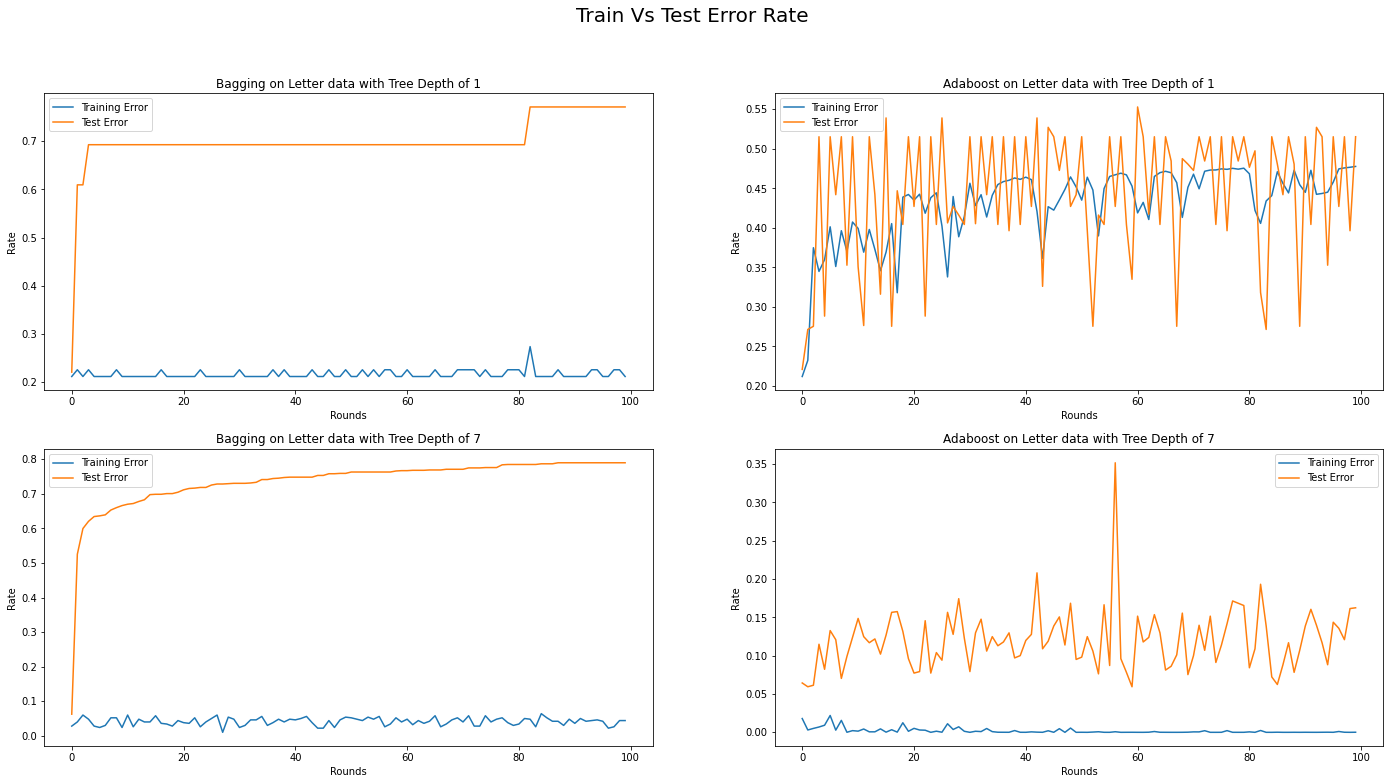

In [ ]:
T = 100
results = []
plot_data = []

X_train_letter, X_test_letter, y_train_letter, y_test_letter = split_df(x_letter, y_letter, letter_test_samples)
depth = 1
letter_predictions_boosting, letter_accuracy_boosting, letter_training_errors_boosting, letter_testing_errors_boosting = run_AdaBoost(X_train_letter, X_test_letter, y_train_letter, y_test_letter, T, depth)
letter_predictions_bagging, letter_accuracy_bagging, letter_training_errors_bagging, letter_testing_errors_bagging = run_Bagging(X_train_letter, X_test_letter, y_train_letter, y_test_letter, T, depth)

# Gathering results and metrics for plotting
results.append(["Letter", depth, len(X_train_letter), len(X_test_letter), letter_accuracy_boosting, letter_accuracy_bagging])
plot_data.append([letter_training_errors_boosting, letter_testing_errors_boosting, "Adaboost", "Letter", depth])
plot_data.append([letter_training_errors_bagging, letter_testing_errors_bagging, "Bagging", "Letter", depth])

depth = 7
letter_predictions_boosting, letter_accuracy_boosting, letter_training_errors_boosting, letter_testing_errors_boosting = run_AdaBoost(X_train_letter, X_test_letter, y_train_letter, y_test_letter, T, depth)
letter_predictions_bagging, letter_accuracy_bagging, letter_training_errors_bagging, letter_testing_errors_bagging = run_Bagging(X_train_letter, X_test_letter, y_train_letter, y_test_letter, T, depth)

# Gathering results and metrics for plotting
results.append(["Letter", depth, len(X_train_letter), len(X_test_letter), letter_accuracy_boosting, letter_accuracy_bagging])
plot_data.append([letter_training_errors_boosting, letter_testing_errors_boosting, "Adaboost", "Letter", depth])
plot_data.append([letter_training_errors_bagging, letter_testing_errors_bagging, "Bagging", "Letter", depth])

plot_metrics(T, plot_data)

The above plots represent the training and test error rates as the number of rounds of Bagging/ Boosting algorithms increase for the Letter data. 

*   It can observed that for Bagging the test error rate is low in initial rounds. However, as the rounds increment the test error rate also increases and tends to be constant after initial few rounds.
*   Whereas, the training error remains low and does not fluctuate much.
*   For Adaboost with Decision Stump the training and test error fluctuate for each round. The frequency of fluctuation for the test error is more as compared to the training error.
*   Similarly, for Adaboost with deep trees the testing error fluctuates but the training error remains nearly constant throughout.
*   There is not much difference in predictions when we run the Adaboost model on the Letter Dataset with a different tree depths. 
*   All the attributes in the letter dataset are numerical and the accuracy lies near about 51%.


Running algorithms on the Credit dataset:

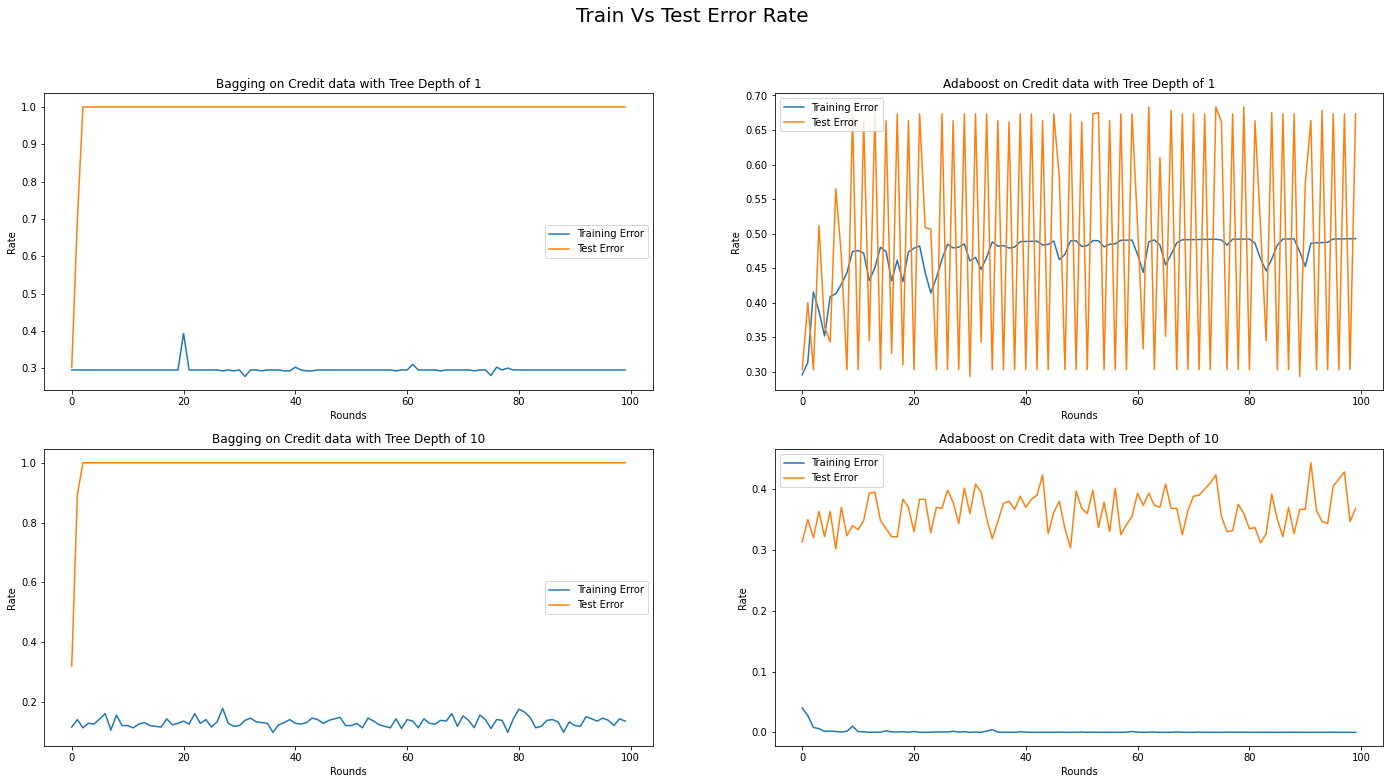

In [ ]:
plot_data = []
X_train_credit, X_test_credit, y_train_credit, y_test_credit = split_df(x_credit, y_credit, credit_test_samples)
depth = 1
credit_predictions_boosting, credit_accuracy_boosting, credit_training_errors_boosting, credit_testing_errors_boosting = run_AdaBoost(X_train_credit, X_test_credit, y_train_credit, y_test_credit, T, depth)
credit_predictions_bagging, credit_accuracy_bagging, credit_training_errors_bagging, credit_testing_errors_bagging = run_Bagging(X_train_credit, X_test_credit, y_train_credit, y_test_credit, T, depth)

# Gathering results and metrics for plotting
results.append(["Credit", depth, len(X_train_credit), len(X_test_credit), credit_accuracy_boosting, credit_accuracy_bagging])
plot_data.append([credit_training_errors_boosting, credit_testing_errors_boosting, "Adaboost", "Credit", depth])
plot_data.append([credit_training_errors_bagging, credit_testing_errors_bagging, "Bagging", "Credit", depth])

depth = 10
credit_predictions_boosting, credit_accuracy_boosting, credit_training_errors_boosting, credit_testing_errors_boosting = run_AdaBoost(X_train_credit, X_test_credit, y_train_credit, y_test_credit, T, depth)
credit_predictions_bagging, credit_accuracy_bagging, credit_training_errors_bagging, credit_testing_errors_bagging = run_Bagging(X_train_credit, X_test_credit, y_train_credit, y_test_credit, T, depth)

# Gathering results and metrics for plotting
results.append(["Credit", depth, len(X_train_credit), len(X_test_credit), credit_accuracy_boosting, credit_accuracy_bagging])
plot_data.append([credit_training_errors_boosting, credit_testing_errors_boosting, "Adaboost", "Credit", depth])
plot_data.append([credit_training_errors_bagging, credit_testing_errors_bagging, "Bagging", "Credit", depth])

plot_metrics(T, plot_data)

The above plots represent the training and test error rates as the number of rounds of Bagging/ Boosting algorithms increase for the Credit data. 

*   Like, the letter dataset for Bagging the test error rate is low in initial rounds. However, as the rounds increment the test error rate also increases and tends to be constant after initial few rounds.
*   Major difference in this case is that the test error becomes a singular constant value after intial 2 - 3 rounds.
*   Whereas, the training error remains very low and does not fluctuate much.
*   For Adaboost with Decision Stump the training and test error fluctuate for each round. The frequency of fluctuation for the test error is more as compared to the training error.
*   Interestingly, for Adaboost with deep trees the rate of fluctuation of testing error is low and the training error remains nearly constant throughout.
*   There is not much difference in accuracy when we run the Adaboost model with different tree depths.
*   Credit dataset has categorical variables and we had used label encoder to create the additional dummy features. 
*   The accuracy came out to be better (around 70%) as compared to the letter dataset (51%) which had all numerical data.

Running algorithms on the Spam dataset:

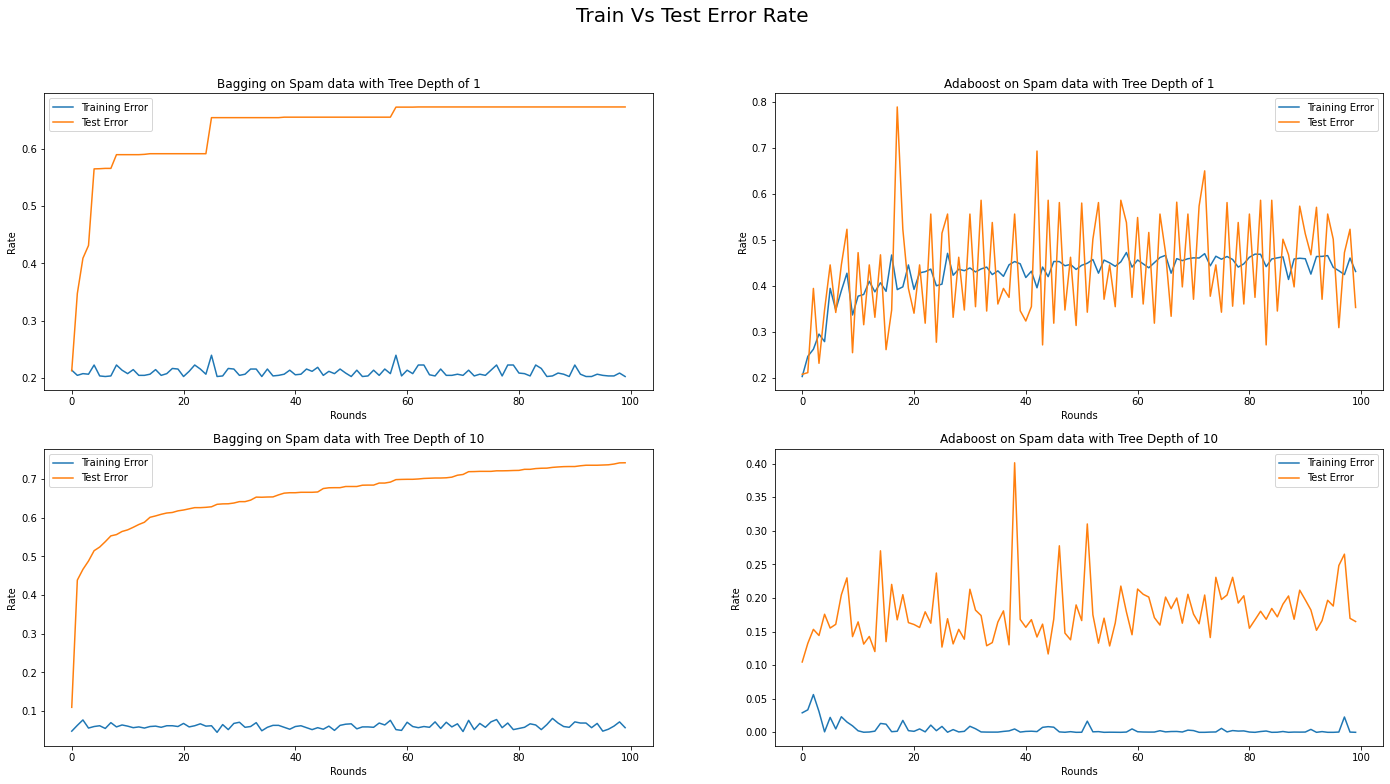

In [ ]:
plot_data = []
X_train_spam, X_test_spam, y_train_spam, y_test_spam = split_df(x_spam, y_spam, spam_test_samples)
depth = 1
spam_predictions_boosting, spam_accuracy_boosting, spam_training_errors_boosting, spam_testing_errors_boosting = run_AdaBoost(X_train_spam, X_test_spam, y_train_spam, y_test_spam, T, depth)
spam_predictions_bagging, spam_accuracy_bagging, spam_training_errors_bagging, spam_testing_errors_bagging = run_Bagging(X_train_spam, X_test_spam, y_train_spam, y_test_spam, T, depth)

# Gathering results and metrics for plotting
results.append(["Spam", depth, len(X_train_spam), len(X_test_spam), spam_accuracy_boosting, spam_accuracy_bagging])
plot_data.append([spam_training_errors_boosting, spam_testing_errors_boosting, "Adaboost", "Spam", depth])
plot_data.append([spam_training_errors_bagging, spam_testing_errors_bagging, "Bagging", "Spam", depth])

depth = 10
spam_predictions_boosting, spam_accuracy_boosting, spam_training_errors_boosting, spam_testing_errors_boosting = run_AdaBoost(X_train_spam, X_test_spam, y_train_spam, y_test_spam, T, depth)
spam_predictions_bagging, spam_accuracy_bagging, spam_training_errors_bagging, spam_testing_errors_bagging = run_Bagging(X_train_spam, X_test_spam, y_train_spam, y_test_spam, T, depth)

# Gathering results and metrics for plotting
results.append(["Spam", depth, len(X_train_spam), len(X_test_spam), spam_accuracy_boosting, spam_accuracy_bagging])
plot_data.append([spam_training_errors_boosting, spam_testing_errors_boosting, "Adaboost", "Spam", depth])
plot_data.append([spam_training_errors_bagging, spam_testing_errors_bagging, "Bagging", "Spam", depth])

plot_metrics(T, plot_data)

The above plots represent the training and test error rates as the number of rounds of Bagging/ Boosting algorithms increase for the Credit data. 

*   The observations for both the models in this dataset are similar to the Letter data since both of these contain continuous values in the features.
*   In Bagging, the test error rate is low in initial rounds. However, as the rounds increment the test error rate also increases and tends to be constant after initial few rounds.
*   Whereas, the training error remains very low and does not fluctuate much.
*   For Adaboost with Decision Stump the training and test error fluctuate for each round. The frequency of fluctuation for the test error is more as compared to the training error.
*   In deep trees the rate of fluctuation of testing error is low and the training error remains nearly constant throughout.
*   There is not much difference in accuracy when we run the Adaboost model with different tree depths.
*   The spam dataset has more features as compared to letter dataset and all the features are numerical. This could be a potential reason for such low accuracy (39%). 

After running both the models on all the three datasets with deep as well as shallow trees, the accuracy of each model is summarized in the table below:

In [ ]:
display_results(results)

Dataset      Tree Depth    Training Samples    Testing Samples    AdaBoost Accuracy    Bagging Accuracy
---------  ------------  ------------------  -----------------  -------------------  ------------------
Letter                1                 500               1009             0.515362            0.778989
Letter                7                 500               1009             0.515362            0.952428
Credit                1                 399                600             0.696667            0.696667
Credit               10                 399                600             0.696667            0.74
Spam                  1                 999               3601             0.389059            0.800333
Spam                 10                 999               3601             0.390447            0.928909


**Overall Observations:**
*   The accuracy improved drastically for all the datasets while running the Bagging model with increased number of tree depth. Hence, as depth of the tree increases, the model is able to make better predictions.
*   Ater comparing the Adaboost model result on numerical data with a difference in the number of columns and categorical data, we can conclude (though not generalize) that the model performs better on categorical dataset as compared to the numerical dataset.
*   Also, in case of numerical dataset, it also depends upon the number of columns. Accuracy decreases with increasing number of numerical columns.
*   Whereas Bagging performs on a similar scale on categorical as well as numerical dataset.
*   In comparision to Adaboost, while working in numerical dataset, the accuracy doesnot changes with change in the number of columns.

**Conclusion:**

*   Adaboost gives more or less the same accuracy on the given dataset with different depths of the tree.

*   The accuracy of Bagging model improves with increased depth of the tree.

*   If we compare the performance of Bagging and Adaboost models on a given depth, Bagging out performs Adaboost model each time.

*   Though we cannot generalize that Bagging performs better than Boosting but here as per the datasets and model with same parameters, the case seems to be in favour of Bagging.

*   Bagging in general suppress the effect of outliers whereas Boosting is sensitive to outliers

*   Looking at the Bagging accuracy for all the six different combinations, we observe that when the data is homogenous (all the columns numerical in letter and spam dataset), the model performs better as compared to the dataset which involves heterogenous data (credit data which had numerical as well as categorical data)

*   Moreover, Adaboost performs much better on heterogenous dataset as compared to homogenous data. It does not changes much with change in hyperparameters like depth but certainly changes with the type of dataset.